# Team Ya Julia
---
## Exploratory Data Analysis


In [1]:
#installing libraries
! pip install pandas

In [2]:
! pip install matplotlib

In [3]:
##Libraries
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
# using plant 1

generation_data=pd.read_csv("/kaggle/input/solar-data/Plant_1_Generation_Data.csv")
weather_data=pd.read_csv("/kaggle/input/solar-data/Plant_1_Weather_Sensor_Data.csv")

In [5]:
generation_data.sample(5).style.set_properties(
    **{
        'background-color': 'OliveDrab',
        'color': 'white',
        'border-color': 'darkblack'
    })

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
27715,29-05-2020 09:45,4135001,7JYdWkrLSPkdwr4,8444.428571,825.857143,1370.714286,7708198.714000
22942,26-05-2020 18:30,4135001,uHbuxQJl8lW7ozc,0.000000,0.000000,0.000000,7128538.000000
38664,03-06-2020 15:30,4135001,WRmjgnKYAwPKWDb,5883.428571,576.500000,6863.285714,7173780.286000
14746,22-05-2020 18:00,4135001,zBIq5rxdHJRwDNY,286.142857,27.657143,7202.000000,6395801.000000
53152,10-06-2020 13:45,4135001,sjndEbLyjtCKgGv,9324.250000,911.937500,4867.750000,7213962.750000


In [6]:
weather_data.sample(5).style.set_properties(
    **{
        'background-color': 'pink',
        'color': 'Black',
        'border-color': 'darkblack'
    })

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
307,2020-05-18 07:30:00,4135001,HmiyD2TTLFNqkNe,22.696124,28.360956,0.244623
1118,2020-05-27 07:30:00,4135001,HmiyD2TTLFNqkNe,25.215722,29.431407,0.254300
1452,2020-05-30 23:15:00,4135001,HmiyD2TTLFNqkNe,23.267813,21.473875,0.000000
1551,2020-06-01 00:00:00,4135001,HmiyD2TTLFNqkNe,23.128673,20.464305,0.000000
2884,2020-06-14 21:30:00,4135001,HmiyD2TTLFNqkNe,23.862891,22.984143,0.000000


In [7]:
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'])
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'])

/tmp/ipykernel_17/1148446762.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'])


In [8]:
df_solar = pd.merge(generation_data.drop(columns = ['PLANT_ID']), weather_data.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')
df_solar.sample(5).style.background_gradient(cmap='cool')

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
32377,2020-05-31 15:30:00,YxYtjZvoooNbGkE,3299.428571,324.157143,5466.857143,7305235.857000,27.533612,32.339262,0.216161
62261,2020-06-14 21:15:00,zVJPv84UY57bAof,0.000000,0.000000,7320.000000,7344280.000000,23.920254,23.285942,0.000000
11087,2020-05-20 11:00:00,uHbuxQJl8lW7ozc,11592.375000,1130.837500,2985.500000,7074183.500000,29.315938,52.126074,0.848851
41735,2020-06-05 03:00:00,uHbuxQJl8lW7ozc,0.000000,0.000000,0.000000,7194535.000000,21.960252,19.703837,0.000000
49421,2020-06-08 19:30:00,YxYtjZvoooNbGkE,0.000000,0.000000,8343.000000,7365310.000000,25.331020,22.709330,0.000000


In [9]:
# adding separate time and date columns
df_solar["DATE"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.date
df_solar["TIME"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.time
df_solar['DAY'] = pd.to_datetime(df_solar['DATE_TIME']).dt.day
df_solar['MONTH'] = pd.to_datetime(df_solar['DATE_TIME']).dt.month


# add hours and minutes for ml models
df_solar['HOURS'] = pd.to_datetime(df_solar['TIME'],format='%H:%M:%S').dt.hour
df_solar['MINUTES'] = pd.to_datetime(df_solar['TIME'],format='%H:%M:%S').dt.minute
df_solar['TOTAL MINUTES PASS'] = df_solar['MINUTES'] + df_solar['HOURS']*60

# add date as string column
df_solar["DATE_STRING"] = df_solar["DATE"].astype(str) # add column with date as string
df_solar["HOURS"] = df_solar["HOURS"].astype(str)
df_solar["TIME"] = df_solar["TIME"].astype(str)

df_solar.head(2)

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING
0,2020-05-15,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,0,0,0,2020-05-15
1,2020-05-15,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,0,0,0,2020-05-15


In [10]:
df_solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68774 entries, 0 to 68773
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            68774 non-null  datetime64[ns]
 1   SOURCE_KEY           68774 non-null  object        
 2   DC_POWER             68774 non-null  float64       
 3   AC_POWER             68774 non-null  float64       
 4   DAILY_YIELD          68774 non-null  float64       
 5   TOTAL_YIELD          68774 non-null  float64       
 6   AMBIENT_TEMPERATURE  68774 non-null  float64       
 7   MODULE_TEMPERATURE   68774 non-null  float64       
 8   IRRADIATION          68774 non-null  float64       
 9   DATE                 68774 non-null  object        
 10  TIME                 68774 non-null  object        
 11  DAY                  68774 non-null  int32         
 12  MONTH                68774 non-null  int32         
 13  HOURS                68774 non-

In [11]:
df_solar.isnull().sum()

DATE_TIME              0
SOURCE_KEY             0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
DATE                   0
TIME                   0
DAY                    0
MONTH                  0
HOURS                  0
MINUTES                0
TOTAL MINUTES PASS     0
DATE_STRING            0
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_solar['SOURCE_KEY_NUMBER'] = encoder.fit_transform(df_solar['SOURCE_KEY'])
df_solar.head()

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING,SOURCE_KEY_NUMBER
0,2020-05-15,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,0,0,0,2020-05-15,0
1,2020-05-15,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,0,0,0,2020-05-15,1
2,2020-05-15,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,0,0,0,2020-05-15,2
3,2020-05-15,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,0,0,0,2020-05-15,3
4,2020-05-15,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,0,0,0,2020-05-15,4


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


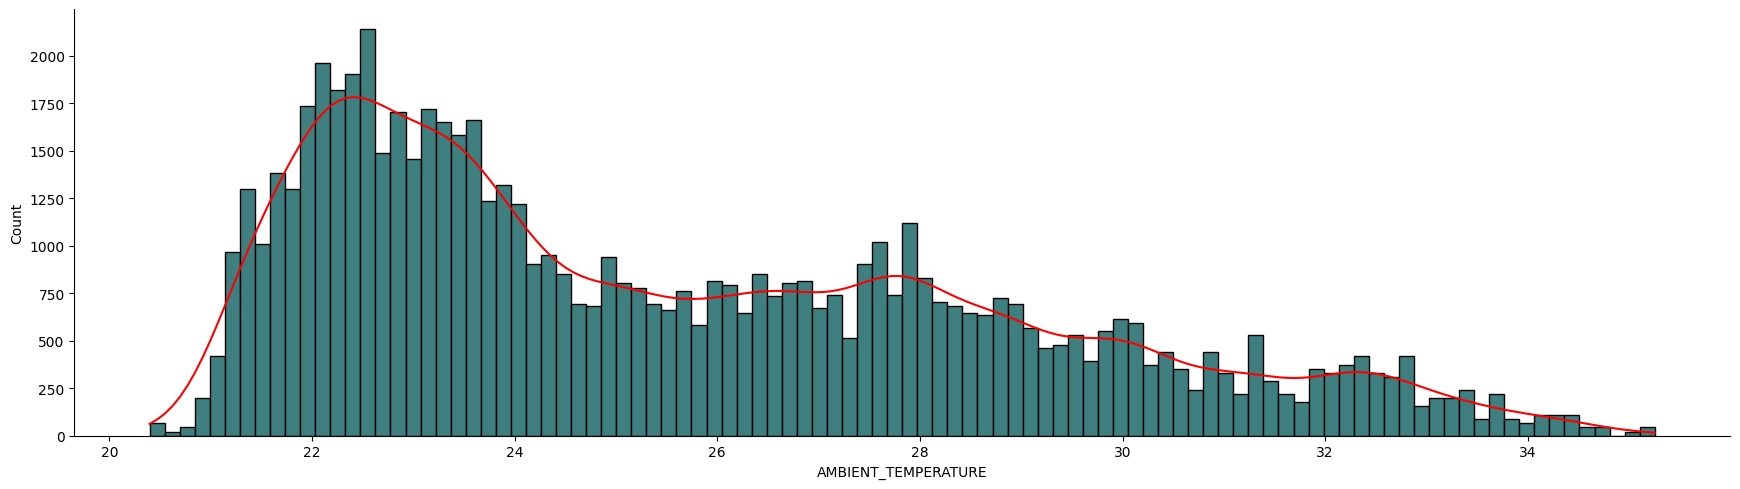

In [13]:
import seaborn as sns
sns.displot(data=df_solar, x="AMBIENT_TEMPERATURE", kde=True, bins = 100,color = "red", facecolor = "#3F7F7F",height = 5, aspect = 3.5);

In [14]:
# Remove rows where DC_POWER is 0
df_solar = df_solar[df_solar['DC_POWER'] != 0]

# Display the filtered DataFrame
print("\nFiltered DataFrame (DC_POWER != 0):")
print(df_solar)


Filtered DataFrame (DC_POWER != 0):
                DATE_TIME       SOURCE_KEY   DC_POWER  AC_POWER  DAILY_YIELD  \
510   2020-05-15 06:00:00  1BY6WEcLGh8j5v7  37.142857  3.585714     0.000000   
511   2020-05-15 06:00:00  1IF53ai7Xc0U56Y  53.500000  5.162500     0.000000   
512   2020-05-15 06:00:00  3PZuoBAID5Wc2HD  58.000000  5.585714     0.000000   
513   2020-05-15 06:00:00  7JYdWkrLSPkdwr4  58.428571  5.628571     0.000000   
514   2020-05-15 06:00:00  McdE0feGgRqW7Ca  54.375000  5.250000     0.000000   
...                   ...              ...        ...       ...          ...   
68307 2020-06-17 18:30:00  uHbuxQJl8lW7ozc  79.000000  7.614286  5966.142857   
68308 2020-06-17 18:30:00  wCURE6d3bPkepu2  75.714286  7.300000  5882.714286   
68309 2020-06-17 18:30:00  z9Y9gH1T5YWrNuG  77.428571  7.471429  5818.428571   
68310 2020-06-17 18:30:00  zBIq5rxdHJRwDNY  74.857143  7.228571  5816.142857   
68311 2020-06-17 18:30:00  zVJPv84UY57bAof  77.714286  7.485714  5909.142857   

  

In [15]:
# Scaling
# Set the target min and max values for scaling
target_min = 0
target_max = 12.06

# Calculate the original min and max of the DC_POWER column
dc_power_min = df_solar['DC_POWER'].min()
dc_power_max = df_solar['DC_POWER'].max()

# Apply the min-max scaling formula to scale DC_POWER between 0 and 12.06
df_solar['DC_POWER'] = target_min + (df_solar['DC_POWER'] - dc_power_min) * (target_max - target_min) / (dc_power_max - dc_power_min)

In [16]:
# Add a new column 'anomaly' with all values set to 0
# Calculate the 5th and 95th percentiles
lower_bound = df_solar['DC_POWER'].quantile(0.05)
upper_bound = df_solar['DC_POWER'].quantile(0.95)

# Create the anomaly column
df_solar['anomaly'] = 0  # Initialize with 0
df_solar.loc[(df_solar['DC_POWER'] > upper_bound) | (df_solar['DC_POWER'] < lower_bound), 'anomaly'] = 1

# Display the updated DataFrame
print("Updated DataFrame with Anomaly Column:")
print(df_solar)

# Display the DataFrame with the new column
df_solar.sample(5).style.background_gradient(cmap='cool')

Updated DataFrame with Anomaly Column:
                DATE_TIME       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  \
510   2020-05-15 06:00:00  1BY6WEcLGh8j5v7  0.023676  3.585714     0.000000   
511   2020-05-15 06:00:00  1IF53ai7Xc0U56Y  0.037316  5.162500     0.000000   
512   2020-05-15 06:00:00  3PZuoBAID5Wc2HD  0.041069  5.585714     0.000000   
513   2020-05-15 06:00:00  7JYdWkrLSPkdwr4  0.041426  5.628571     0.000000   
514   2020-05-15 06:00:00  McdE0feGgRqW7Ca  0.038046  5.250000     0.000000   
...                   ...              ...       ...       ...          ...   
68307 2020-06-17 18:30:00  uHbuxQJl8lW7ozc  0.058581  7.614286  5966.142857   
68308 2020-06-17 18:30:00  wCURE6d3bPkepu2  0.055841  7.300000  5882.714286   
68309 2020-06-17 18:30:00  z9Y9gH1T5YWrNuG  0.057270  7.471429  5818.428571   
68310 2020-06-17 18:30:00  zBIq5rxdHJRwDNY  0.055126  7.228571  5816.142857   
68311 2020-06-17 18:30:00  zVJPv84UY57bAof  0.057508  7.485714  5909.142857   

       TOTAL

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING,SOURCE_KEY_NUMBER,anomaly
63227,2020-06-15 08:15:00,z9Y9gH1T5YWrNuG,6.408995,753.257143,557.857143,7233025.857000,25.257212,40.661761,0.536358,2020-06-15,08:15:00,15,6,8,15,495,2020-06-15,19,0
30450,2020-05-30 17:30:00,sjndEbLyjtCKgGv,1.547904,182.825000,7151.375000,7136180.375000,30.037693,32.640356,0.141014,2020-05-30,17:30:00,30,5,17,30,1050,2020-05-30,16,0
30100,2020-05-30 13:30:00,wCURE6d3bPkepu2,9.295870,1089.137500,4162.875000,6900042.875000,29.138918,53.387913,0.805624,2020-05-30,13:30:00,30,5,13,30,810,2020-05-30,18,0
63404,2020-06-15 10:15:00,zBIq5rxdHJRwDNY,10.057493,1177.114286,2181.571429,6567318.571000,27.559886,48.580129,0.888736,2020-06-15,10:15:00,15,6,10,15,615,2020-06-15,20,0
67626,2020-06-17 10:45:00,wCURE6d3bPkepu2,5.622489,661.250000,1784.000000,7024502.000000,26.470134,41.115753,0.464914,2020-06-17,10:45:00,17,6,10,45,645,2020-06-17,18,0


In [17]:
df_solar['anomaly'].unique()

array([1, 0])

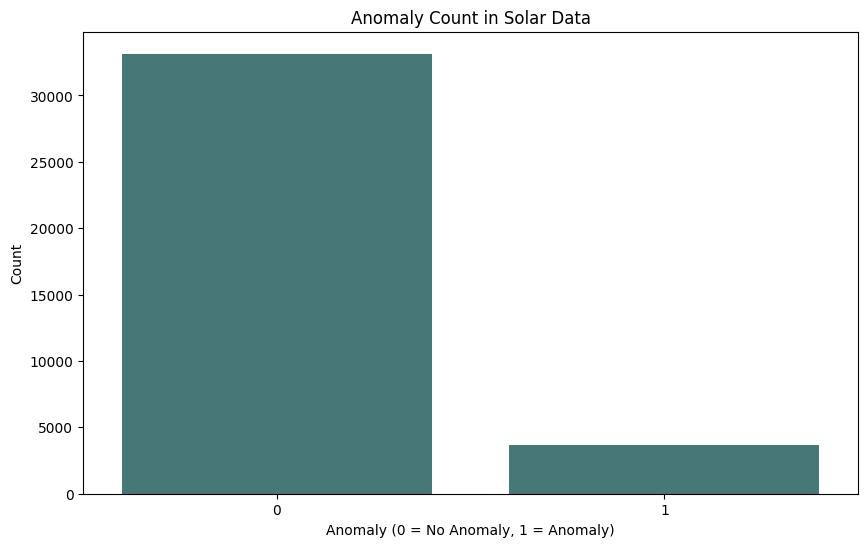

In [18]:
# Create a bar graph using countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df_solar, x="anomaly", color="red", palette=["#3F7F7F"])

# Customize plot appearance
plt.title("Anomaly Count in Solar Data")
plt.xlabel("Anomaly (0 = No Anomaly, 1 = Anomaly)")
plt.ylabel("Count")

# Show the plot
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


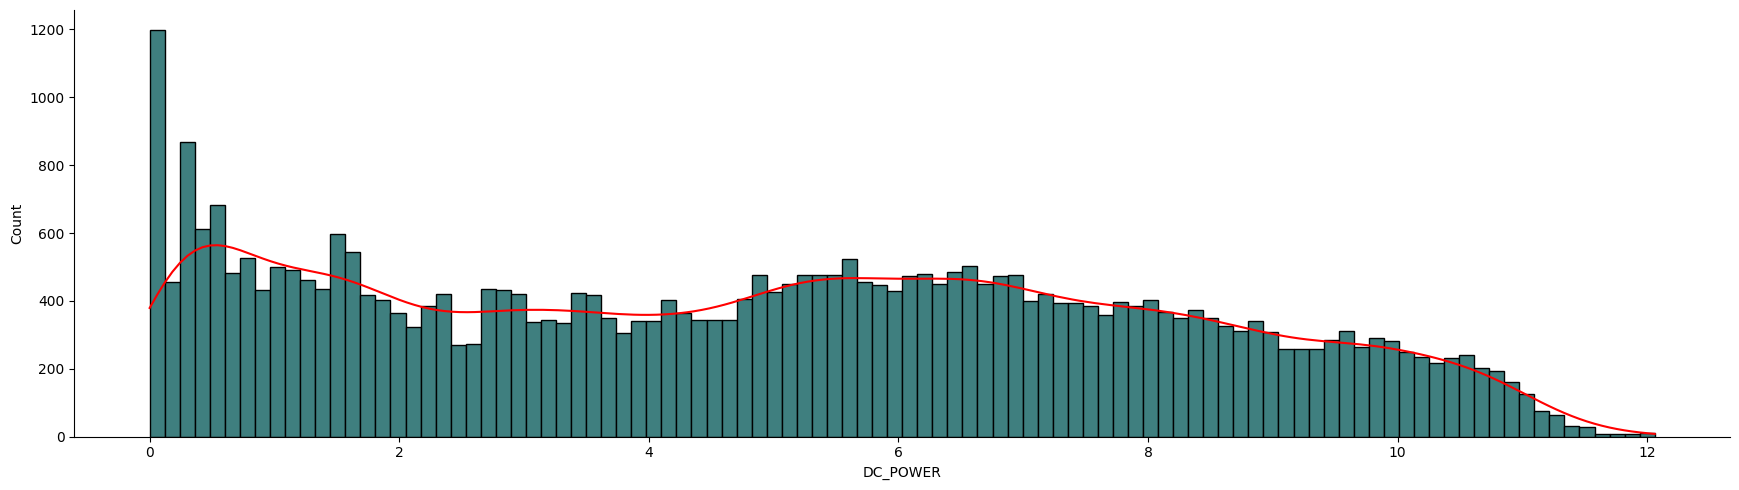

In [19]:
sns.displot(data=df_solar, x="DC_POWER", kde=True, bins = 100,color = "red", facecolor = "#3F7F7F",height = 5, aspect = 3.5);

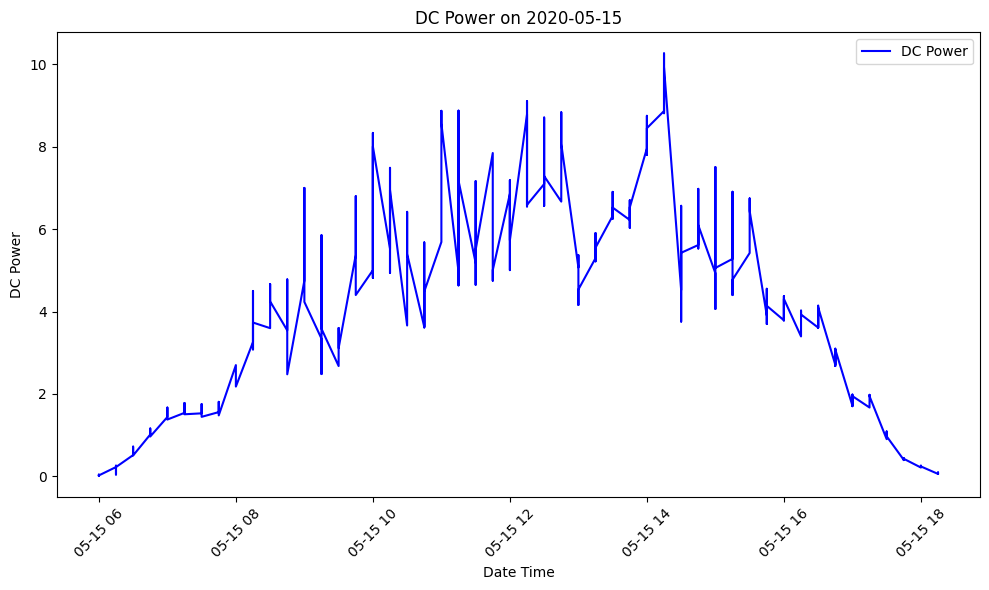

In [20]:
# Filter the DataFrame for the specific day (May 15, 2020)
specific_day = df_solar[(df_solar['DATE_TIME'] >= '2020-05-15') & (df_solar['DATE_TIME'] < '2020-05-16')]

# Plotting DATE_TIME vs DC_POWER for May 15, 2020
plt.figure(figsize=(10, 6))  # Set figure size
plt.plot(specific_day['DATE_TIME'], specific_day['DC_POWER'], label='DC Power', color='blue')

# Adding labels and title
plt.xlabel('Date Time')
plt.ylabel('DC Power')
plt.title('DC Power on 2020-05-15')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Displaying the legend
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [21]:
# Save the DataFrame to a CSV file
df_solar.to_csv('df_solar_data.csv', index=False)  # index=False to avoid saving the index column


In [22]:
df_solar['DATE'].nunique()

34

In [23]:
df_solar.describe().style.background_gradient(cmap='rainbow')


,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DAY,MONTH,MINUTES,TOTAL MINUTES PASS,SOURCE_KEY_NUMBER,anomaly
count,36823,36823.000000,36823.000000,36823.000000,36823.000000,36823.000000,36823.000000,36823.000000,36823.000000,36823.000000,36823.000000,36823.000000,36823.000000,36823.000000
mean,2020-06-01 05:42:34.843440384,4.894260,574.835021,3603.702508,6979050.392806,27.591988,39.739737,0.432532,15.905657,5.510415,22.162507,733.523341,10.504657,0.100046
min,2020-05-15 06:00:00,0.000000,0.850000,0.000000,6183645.000000,20.426455,18.254061,0.001575,1.000000,5.000000,0.000000,360.000000,0.000000,0.000000
25%,2020-05-24 06:15:00,1.964685,231.878571,903.875000,6513545.419500,25.260909,30.093761,0.170033,9.000000,5.000000,0.000000,540.000000,5.000000,0.000000
50%,2020-06-01 10:15:00,4.970181,584.812500,3580.000000,7146656.714000,27.662699,40.345451,0.427414,16.000000,6.000000,15.000000,735.000000,11.000000,0.000000
75%,2020-06-09 14:00:00,7.405312,869.228571,5909.214286,7268572.169500,29.873128,48.281902,0.653621,23.000000,6.000000,30.000000,915.000000,16.000000,0.000000
max,2020-06-17 18:30:00,12.060000,1410.950000,9162.857143,7846821.000000,35.252486,65.545714,1.221652,31.000000,6.000000,45.000000,1110.000000,21.000000,1.000000
std,nan,3.162029,370.135588,2692.211927,415968.057560,3.182527,11.138493,0.287976,8.622227,0.499898,16.668472,217.270330,6.341680,0.300066


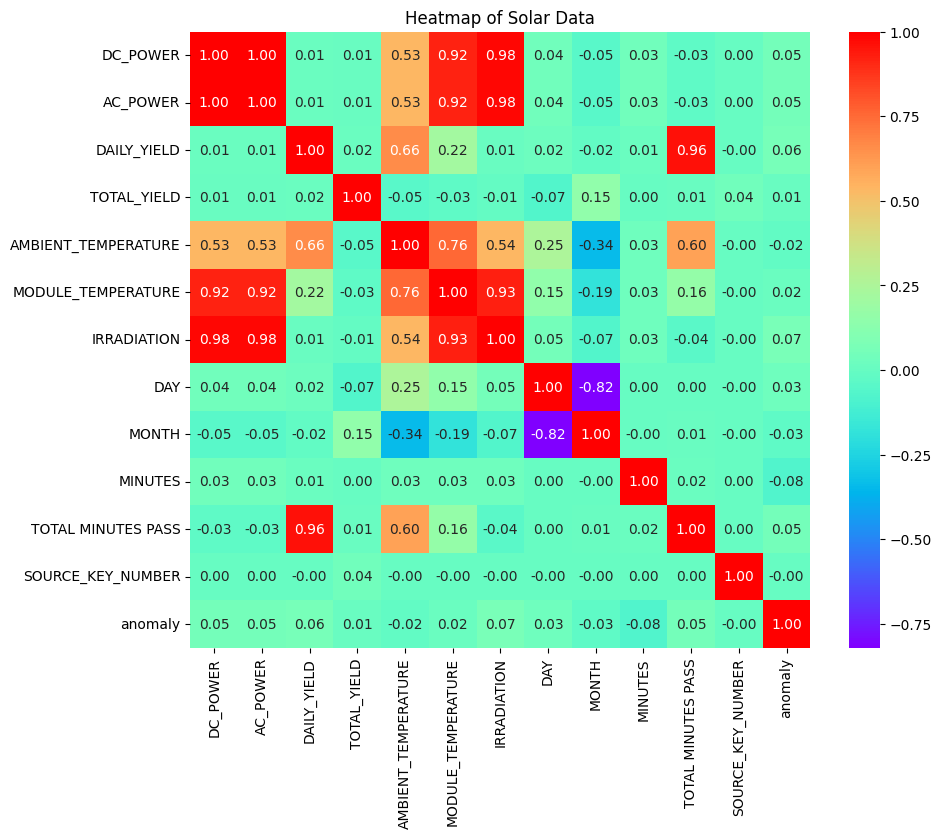

In [24]:
# Select only numeric columns
numeric_df = df_solar.select_dtypes(include=['number'])

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='rainbow', fmt='.2f')
plt.title('Heatmap of Solar Data')
plt.show()


## Machine Learning: Modelling and Serialization

In [25]:
! pip install scikit-learn

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [27]:
df_solar.columns

Index(['DATE_TIME', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER', 'DAILY_YIELD',
       'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
       'IRRADIATION', 'DATE', 'TIME', 'DAY', 'MONTH', 'HOURS', 'MINUTES',
       'TOTAL MINUTES PASS', 'DATE_STRING', 'SOURCE_KEY_NUMBER', 'anomaly'],
      dtype='object')

In [28]:
# Features and target
features = ['DC_POWER','AMBIENT_TEMPERATURE', 'IRRADIATION','DAY', 'MONTH', 'HOURS', 'MINUTES']
target = 'anomaly'  # This is the sensor value we're predicting

# Handling missing values
df_solar.fillna(method='ffill', inplace=True)

# Splitting data into features (X) and target (y)
X = df_solar[features]
y = df_solar[target]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

/tmp/ipykernel_17/3808723150.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_solar.fillna(method='ffill', inplace=True)


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np


Confusion Matrix:
[[8266    0]
 [   0  940]]


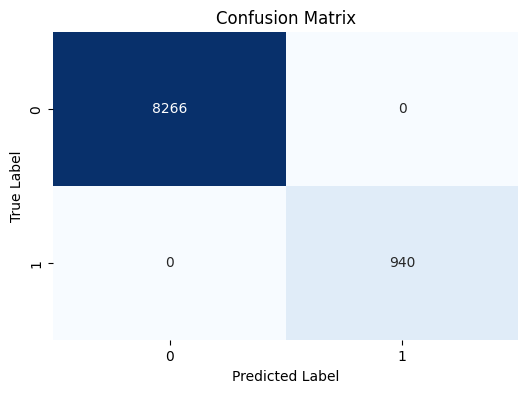


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8266
           1       1.00      1.00      1.00       940

    accuracy                           1.00      9206
   macro avg       1.00      1.00      1.00      9206
weighted avg       1.00      1.00      1.00      9206



In [30]:

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
# Display the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



## Serializing Model

In [31]:
! pip install joblib

In [32]:
import joblib

# Serialize the trained model
joblib.dump(rf_classifier, 'solar_predictor.pkl')

# If you're using scaling (optional), serialize the scaler too
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [33]:
# Load the serialized model
rf_model = joblib.load('solar_predictor.pkl')

# Load the scaler (if used)
scaler = joblib.load('scaler.pkl')

#features = ['DC_POWER','AMBIENT_TEMPERATURE', 'IRRADIATION','DAY', 'MONTH', 'HOURS', 'MINUTES']
# Example: New incoming sensor data with lagged values for DC_POWER and IRRADIATION
new_sensor_data = pd.DataFrame({
    'DC_POWER': [110],                  # Current DC power value
    'AMBIENT_TEMPERATURE': [30],         # Current ambient temperature
    'IRRADIATION': [900],                # Current irradiation
    'DAY': [26],                         # Current day
    'MONTH': [9],                        # Current month
    'HOURS': [12],                       # Current hour
    'MINUTES': [15]                     # Current minute
})

# If scaling is used, scale the new data
new_sensor_data_scaled = scaler.transform(new_sensor_data)

# Predict the sensor value (e.g., DC_POWER)
predicted_anomaly = rf_model.predict(new_sensor_data_scaled)

print(f"Predicted DC Power: {predicted_anomaly}")


Predicted DC Power: [1]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
